In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
feature = pd.read_csv('feature.csv', error_bad_lines=False)
feature = feature[feature.columns[0:2]]

In [2]:
# (1) cleaning the data
print(set([train[i].dtype for i in train.columns]))
#there're three kind of type: int64,float64 and object
print(train.select_dtypes(['object']).head())
feature[feature.name.isin(['dependency','edjefe','edjefa'])]

{dtype('int64'), dtype('float64'), dtype('O')}
             Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no


,name,description
99,dependency,Dependency rate
100,edjefe,years of education of male head of household
101,edjefa,years of education of female head of household


In [3]:
train.dependency = train.dependency.replace({"yes": 1, "no": 0}).astype(np.float64)
train.edjefa = train.edjefa.replace({"yes": 1, "no": 0}).astype(np.float64)
train.edjefe = train.edjefe.replace({"yes": 1, "no": 0}).astype(np.float64)
#Now,the only 'object' data is 'idhogar'

In [4]:
print(train.select_dtypes(['object']).head())

             Id    idhogar
0  ID_279628684  21eb7fcc1
1  ID_f29eb3ddd  0e5d7a658
2  ID_68de51c94  2c7317ea8
3  ID_d671db89c  2b58d945f
4  ID_d56d6f5f5  2b58d945f


In [5]:
#(2) finding relationship between education and Target
edu_list = list(feature.name[100:112])+[feature.name[139]]
education = train[edu_list]
education.head()

,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,SQBmeaned
0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,100.0
1,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,144.0
2,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,121.0
3,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,121.0
4,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,121.0


In [6]:
# edjefe,edjefa,meaneduc and SQBmeaned are float64. instlevel 1-9 are int64.
# look at the meaning of this part,we find that SQBmeaned is just the square of meaneduc, they are same.
feature.loc[list(range(100,112))+[139]]

,name,description
100,edjefe,years of education of male head of household
101,edjefa,years of education of female head of household
102,meaneduc,average years of education for adults (18+)
103,instlevel1,=1 no level of education
104,instlevel2,=1 incomplete primary
105,instlevel3,=1 complete primary
106,instlevel4,=1 incomplete academic secondary level
107,instlevel5,=1 complete academic secondary level
108,instlevel6,=1 incomplete technical secondary level
109,instlevel7,=1 complete technical secondary level


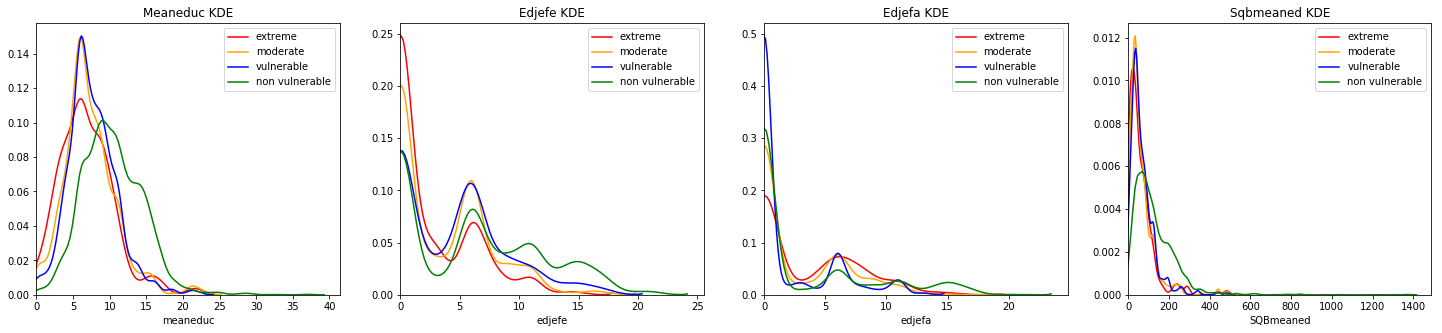

In [7]:
#Firstly,find the relationship between edjefe(float64),edjefa(float64),meaneduc(float64),SQBmeaned(float64) and target
plt.figure(figsize = (25, 5))
colors = dict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
label_mapping = dict({1: 'extreme', 2: 'moderate', 3: 'vulnerable',4: 'non vulnerable'})

for i, col in enumerate(['meaneduc','edjefe','edjefa','SQBmeaned']):
    ax = plt.subplot(1, 4, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # kernel density estimation
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = label_mapping[poverty_level])

    plt.title('%s KDE'%(col.capitalize()))
    plt.xlabel('%s'%col)
    ax.set_xlim(0)

# from the plot, we find that: There were a significant positive correlation between target and years of education of adult

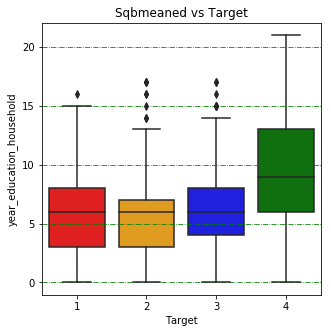

In [8]:
#secondly, using boxplot to find relationship between edjefe,edjefa and target.
#edjefe:years of education of male head of household    edjefa:years of education of female head of household
#key point: household, male, female
plt.figure(figsize = (11, 5))
household = train[train['parentesco1'] == 1].copy()
household['year_education_household'] = household['edjefa'] + household['edjefe'] 

ax = plt.subplot(1, 2, 1)
# boxplot colored by `Target`
sns.boxplot(x = 'Target', y = household['year_education_household'] , data = household , palette = colors)
plt.title('%s vs Target'%(col.capitalize()))
plt.grid(axis = 'y', color = 'green', linestyle ='-.')


#from the plot, we can get two conclusion:
#(1) There were a significant positive correlation between target and years of education of household
#(2) In every poverty-level family, the average years of education of female is a little bit larger that male's.

In [9]:
for poverty_level, color in colors.items():
    sns.violinplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
    ax = ax, color = color, label = label_mapping[poverty_level])

In [10]:
#Then,find the relationship between instlevel and target
instlevel1 = train.pop('instlevel1')
instlevel2 = train.pop('instlevel2')
instlevel3 = train.pop('instlevel3')
instlevel4 = train.pop('instlevel4')
instlevel5 = train.pop('instlevel5')
instlevel6 = train.pop('instlevel6')
instlevel7 = train.pop('instlevel7')
instlevel8 = train.pop('instlevel8')
instlevel9 = train.pop('instlevel9')

In [11]:
instlevel = (instlevel1+2*instlevel2+3*instlevel3+4*instlevel4+5*instlevel5+6*instlevel6+7*instlevel7+8*instlevel8+9*instlevel9)**2
train.insert(0,'instlevel',instlevel)
train['instlevel'].head()

0    16
1    64
2    25
3    16
4    25
Name: instlevel, dtype: int64

Text(0.5,0,'instlevel')

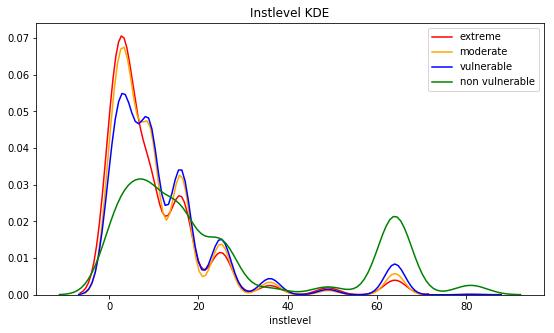

In [14]:
plt.figure(figsize = (20, 5))
colors = dict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
label_mapping = dict({1: 'extreme', 2: 'moderate', 3: 'vulnerable',4: 'non vulnerable'})

ax = plt.subplot(1, 2, 1)
# Iterate through the poverty levels
for poverty_level, color in colors.items():
    # kernel density estimation
    sns.kdeplot(train.loc[train['Target'] == poverty_level, 'instlevel'].dropna(), 
                ax = ax, color = color, label = label_mapping[poverty_level])

plt.title('%s KDE'%('instlevel'.capitalize()))
plt.xlabel('%s'% 'instlevel')
# from the plot, we find that: There were a significant positive correlation between target and education background

In [1]:
import preprocessing

In [2]:
hh_char = preprocessing.INECDataSet('household_characteristics').get_dataset()

Start to load data...
Processing... Please wait...


C:\Users\zhangqihan\Desktop\ece 143\ece143-master\preprocessing.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  year_df['Category'] = year_df['Category'].apply(lambda x: self.category_translation[x])
C:\Users\zhangqihan\Desktop\ece 143\ece143-master\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  year_df['year'] = year


In [18]:
grp = hh_char.groupby('Category')
grp.count()

,Total,Quintil 1,Quintil 2,Quintil 3,Quintil 4,Quintil 5,region,year
Category,,,,,,,,
Average household income per capita,14,14,14,14,14,14,14,14
Average income per household,7,7,7,7,7,7,7,7
Average schooling people of years and older,56,56,56,56,56,56,56,56
Average total household income,14,14,14,14,14,14,14,14
Average weekly hours in the main job,14,14,14,14,14,14,14,14
Demographic dependency relationship,56,56,56,56,56,56,56,56
Economic dependency ratio,56,56,56,56,56,56,56,56
Income per household,35,35,35,35,35,35,35,35
Members per household,56,56,56,56,56,56,56,56


In [124]:
average_school = grp.get_group('Average schooling people of years and older')
average_school['Total'] = average_school['Total'].astype('float')
average_school['Total']

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


28      8.379285
49      8.965708
70      7.519697
91      7.811444
112     7.247699
133     6.789892
154     6.677589
175     8.480445
196     9.045788
217     7.612175
238     7.774358
259     7.303647
280     7.057442
301     6.924890
322     8.564153
343     9.126930
364     7.717043
385     7.968252
406     7.371106
427     7.094334
448     7.051940
469     8.638889
491     9.201933
513     7.819082
535     7.912453
557     7.445987
579     7.160721
601     7.093146
625     8.834958
646     9.439045
667     8.089635
688     8.012823
709     7.749684
730     7.456018
751     7.562022
774     8.676873
795     9.235438
816     8.341158
837     7.912443
858     7.738863
879     7.426234
900     7.114110
922     8.689865
944     9.265076
966     8.420496
988     7.808674
1010    7.782943
1032    7.367252
1054    6.964948
1077    8.720607
1099    9.255396
1121    8.518177
1143    7.908634
1165    7.839380
1187    7.613250
1209    7.013612
Name: Total, dtype: float64

In [119]:
df11 = grp.get_group('Per capita income per household')
df22 = grp.get_group('Average household income per capita')
frames = [df11, df22]
average_income_household_person = pd.concat(frames)
average_income_household_person['Total'] = average_income_household_person['Total'].astype('float')
average_income_household_person['Quintil 1'] = average_income_household_person['Quintil 1'].astype('float')
average_income_household_person['Quintil 2'] = average_income_household_person['Quintil 2'].astype('float')
average_income_household_person['Quintil 3'] = average_income_household_person['Quintil 3'].astype('float')
average_income_household_person['Quintil 4'] = average_income_household_person['Quintil 4'].astype('float')
average_income_household_person['Quintil 5'] = average_income_household_person['Quintil 5'].astype('float')
#print(average_income_household['Total'].values)
average_income_household_person.head()

,Category,Total,Quintil 1,Quintil 2,Quintil 3,Quintil 4,Quintil 5,region,year
20,Per capita income per household,268591.958450,46519.167349,98511.764911,157082.220504,263186.869549,777276.819380,Whole Costa Rica,2010
41,Per capita income per household,304369.754169,57718.644644,116389.423220,182531.212162,302901.299498,862791.659768,Central,2010
62,Per capita income per household,204877.719063,30393.328188,69363.324852,107332.516720,180600.359768,637562.168022,Chorotega,2010
83,Per capita income per household,217952.268695,39967.462470,86269.426677,131793.912692,222265.184769,610938.061871,Pacífico Central,2010
104,Per capita income per household,200264.600494,27536.991923,62823.426825,103295.883453,182340.050202,629894.918939,Brunca,2010


In [120]:
df1 = grp.get_group('Income per household')
df2 = grp.get_group('Average income per household')
df3 = grp.get_group('Average total household income')
frames = [df1, df2, df3]
average_income_household = pd.concat(frames)
average_income_household['Total'] = average_income_household['Total'].astype('float')
average_income_household['Quintil 1'] = average_income_household['Quintil 1'].astype('float')
average_income_household['Quintil 2'] = average_income_household['Quintil 2'].astype('float')
average_income_household['Quintil 3'] = average_income_household['Quintil 3'].astype('float')
average_income_household['Quintil 4'] = average_income_household['Quintil 4'].astype('float')
average_income_household['Quintil 5'] = average_income_household['Quintil 5'].astype('float')
#print(average_income_household['Total'].values)
average_income_household.head()

,Category,Total,Quintil 1,Quintil 2,Quintil 3,Quintil 4,Quintil 5,region,year
19,Income per household,804366.147760,190804.250500,366492.412283,579694.390180,856579.835500,2.027385e+06,Whole Costa Rica,2010
40,Income per household,909472.747660,225715.619690,449589.737816,652746.019623,993172.250393,2.227573e+06,Central,2010
61,Income per household,611592.944525,129412.623600,272200.372646,399253.726060,610636.646717,1.648574e+06,Chorotega,2010
82,Income per household,644143.467850,155182.670089,327772.145250,433435.090752,686582.266035,1.621399e+06,Pacífico Central,2010
103,Income per household,588786.481801,110126.236357,237330.489054,378679.363632,600119.607618,1.628381e+06,Brunca,2010


Text(0.5,1,'Average schooling people of years')

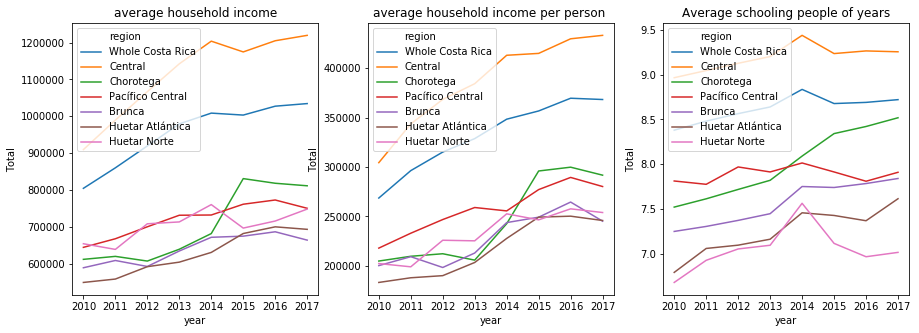

In [123]:
#sns.boxplot(x = 'year', y = 'Total' , data = average_income_household)
plt.figure(figsize = (15, 5))
ax = plt.subplot(1, 3, 1)
sns.lineplot(x="year", y="Total", hue="region" ,data = average_income_household)
plt.title('average household income')
ax = plt.subplot(1, 3, 2)
sns.lineplot(x="year", y="Total", hue="region" ,data = average_income_household_person)
plt.title('average household income per person ')
ax = plt.subplot(1, 3, 3)
sns.lineplot(x="year", y="Total", hue="region" ,data = average_school)
plt.title('Average schooling people of years')

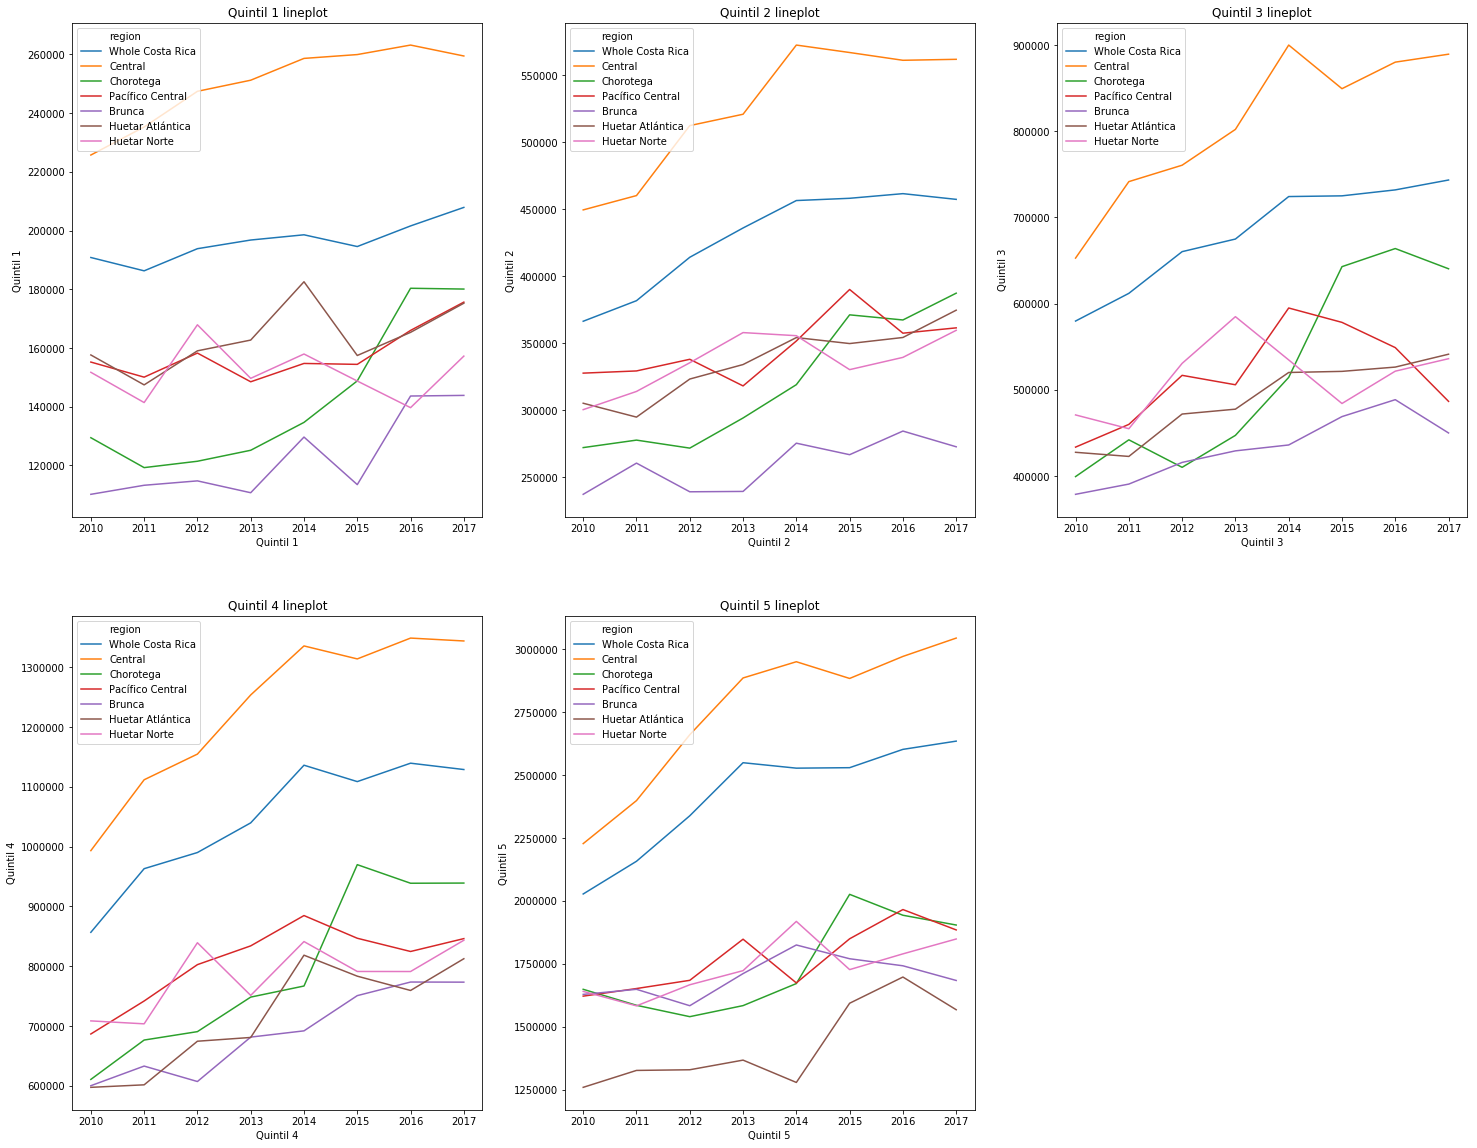

In [96]:
plt.figure(figsize = (25, 20))
for i, col in enumerate(['Quintil 1','Quintil 2','Quintil 3','Quintil 4','Quintil 5']):
    ax = plt.subplot(2, 3, i + 1)
    sns.lineplot(x="year", y=col, hue="region" ,data = average_income_household)
    plt.title('%s lineplot'%(col.capitalize()))
    plt.xlabel('%s'%col)

In [6]:
edu = preprocessing.INECDataSet('edu').get_dataset()

Start to load data...


In [ ]:
edu = preprocessing.INECDataSet('edu').get_dataset()